In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
#Load clean dataset
df_cars = pd.read_csv("../data/clean/cars_clean.csv")
df_cars.head()

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,market category,vehicle size,vehicle style,highway mpg,city mpg,popularity,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Feature Engineering

In [4]:
# Function to rank categorical features based on mean MSRP

def calculate_mean_price_ratio(df, ordinal_columns):
    result_dict = {}
    for col in ordinal_columns:
        # Calculate the mean price for each category in the ordinal column
        col_price = df.groupby(col)['price'].mean().sort_values(ascending=False).reset_index()
        # Calculate the ratio of each mean price to the lowest mean price
        col_price['ratio'] = col_price['price'] / col_price.iloc[-1, -1]
       #setting index
        col_price.set_index(col, inplace=True)
        col_result = {val: col_price.loc[val, 'ratio'] for val in df[col].unique()}
        result_dict[col] = col_result
        df[col] = df[col].map(col_result)
    return df, result_dict

df_cars, result_dictionary = calculate_mean_price_ratio(df_cars, ['make', 'engine fuel type', 'model', 'transmission type', 'driven_wheels', 'market category', 'vehicle size', 'vehicle style'])

In [5]:
df_cars

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,market category,vehicle size,vehicle style,highway mpg,city mpg,popularity,price
0,15.096756,23.067500,2011,3.880438,335.0,6.0,4.716647,2.690938,2.0,7.225191,1.000000,5.507340,26,19,3916,46135
1,15.096756,18.926562,2011,3.880438,300.0,6.0,4.716647,2.690938,2.0,3.783921,1.000000,5.659647,28,19,3916,40650
2,15.096756,18.926562,2011,3.880438,300.0,6.0,4.716647,2.690938,2.0,7.210302,1.000000,5.507340,28,20,3916,36350
3,15.096756,18.926562,2011,3.880438,230.0,6.0,4.716647,2.690938,2.0,3.783921,1.000000,5.507340,28,18,3916,29450
4,15.096756,18.926562,2011,3.880438,230.0,6.0,4.716647,2.690938,2.0,2.649633,1.000000,5.659647,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8167,8.557548,25.531429,2012,3.880438,300.0,6.0,5.950325,2.374099,4.0,4.146657,1.037504,1.329218,23,16,204,46120
8168,8.557548,25.531429,2012,3.880438,300.0,6.0,5.950325,2.374099,4.0,4.146657,1.037504,1.329218,23,16,204,56670
8169,8.557548,25.531429,2012,3.880438,300.0,6.0,5.950325,2.374099,4.0,4.146657,1.037504,1.329218,23,16,204,50620
8170,8.557548,25.531429,2013,1.560714,300.0,6.0,5.950325,2.374099,4.0,4.146657,1.037504,1.329218,23,16,204,50920


In [6]:
#Establish 'features' and 'target'
features = df_cars.drop(columns = ["price"])
target = df_cars["price"]

In [7]:
# Perform the split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

## Normalization

In [8]:
normalizer = MinMaxScaler()

In [9]:
normalizer.fit(X_train)

MinMaxScaler()

In [10]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [11]:
X_train_norm

array([[0.01093897, 0.01436541, 0.74074074, ..., 0.13131313, 0.08461538,
        0.10327144],
       [0.01308969, 0.01479494, 0.88888889, ..., 0.18181818, 0.11538462,
        0.38903625],
       [0.01177957, 0.00702759, 0.7037037 , ..., 0.22222222, 0.15384615,
        0.03678161],
       ...,
       [0.01813784, 0.02161061, 0.96296296, ..., 0.18181818, 0.10769231,
        0.24456233],
       [0.0165997 , 0.01589177, 0.81481481, ..., 0.05050505, 0.04615385,
        1.        ],
       [0.03713976, 0.02829127, 0.7037037 , ..., 0.14141414, 0.1       ,
        0.10804598]])

In [12]:
# Create a dataframe using the transformed values and the original index
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns, index = X_train.index)
X_train_norm.head()

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,market category,vehicle size,vehicle style,highway mpg,city mpg,popularity
2359,0.010939,0.014365,0.740741,0.111113,0.199789,0.250,0.430410,0.000000,1.0,0.048416,0.069719,0.324938,0.131313,0.084615,0.103271
2101,0.013090,0.014795,0.888889,0.000000,0.137421,0.250,0.430410,0.812626,1.0,0.048416,0.000000,0.324938,0.181818,0.115385,0.389036
3544,0.011780,0.007028,0.703704,0.000000,0.053911,0.250,0.323147,0.000000,1.0,0.009885,0.000000,0.070653,0.222222,0.153846,0.036782
3552,0.011780,0.013487,0.703704,0.076003,0.173362,0.375,0.430410,0.000000,1.0,0.054904,0.069719,0.439884,0.141414,0.076923,0.036782
3307,0.016600,0.011384,0.925926,0.170579,0.231936,0.000,0.432700,0.000000,1.0,0.009885,0.000000,0.070653,0.878788,0.792308,1.000000


In [13]:
# Create a dataframe using the transformed values and the original index
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns, index = X_test.index)
X_test_norm.head()

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,market category,vehicle size,vehicle style,highway mpg,city mpg,popularity
4257,0.021856,0.000016,0.185185,0.000000,0.163848,0.375,0.430410,1.000000,1.0,0.055396,0.069719,0.439884,0.101010,0.069231,0.033245
541,0.032781,0.048076,1.000000,0.570798,0.412262,0.500,0.430410,0.812626,1.0,0.208545,1.000000,0.439884,0.121212,0.061538,0.692131
49,0.032781,0.022617,0.962963,0.570798,0.280127,0.375,0.430410,1.000000,0.0,0.209045,0.000000,1.000000,0.181818,0.100000,0.692131
257,0.016437,0.019623,0.666667,0.000000,0.265328,0.375,0.323147,1.000000,0.0,0.091375,0.000000,0.967313,0.131313,0.084615,0.354907
5745,0.015354,0.014886,0.740741,0.076003,0.269556,0.500,0.430410,0.521323,1.0,0.054904,1.000000,0.282004,0.060606,0.046154,0.326967


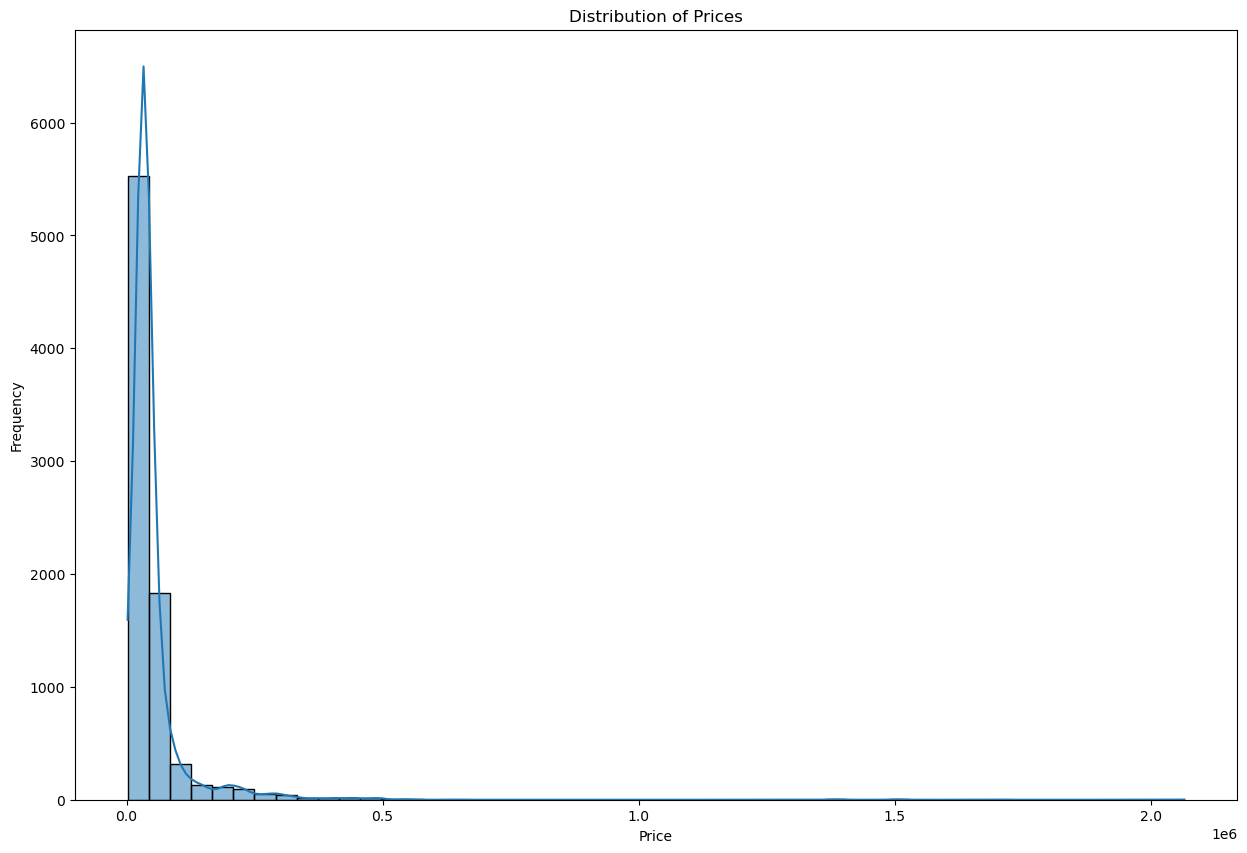

In [66]:
#Plot the distribution of 'price'
prices = df_cars['price']

plt.figure(figsize=(15, 10))
sns.histplot(prices, bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Due to the high distribution of car prices, we will also need to apply the scaler to the y_train

In [15]:
# Reshape y_train & y_test to a 2D array
y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

In [16]:
#normalizer_y = MinMaxScaler()

In [17]:
#normalizer_y.fit(y_train_array)

In [18]:
#y_train_norm = normalizer_y.transform(y_train_array)
#y_test_norm = normalizer_y.transform(y_test_array)

In [19]:
pt_y = PowerTransformer(standardize=True)

In [20]:
pt_y.fit(y_train_array)

PowerTransformer()

In [21]:
y_train_norm = pt_y.transform(y_train_array)
y_test_norm = pt_y.transform(y_test_array)

In [22]:
y_train_norm

array([[-0.13651257],
       [-0.31446666],
       [-0.91678288],
       ...,
       [-0.09066055],
       [-0.30820513],
       [ 0.4981328 ]])

In [23]:
y_train_norm = pd.DataFrame(y_train_norm, columns=['price'], index = y_train.index)
y_test_norm = pd.DataFrame(y_test_norm, columns = ['price'], index = y_test.index)

## Feature Selection

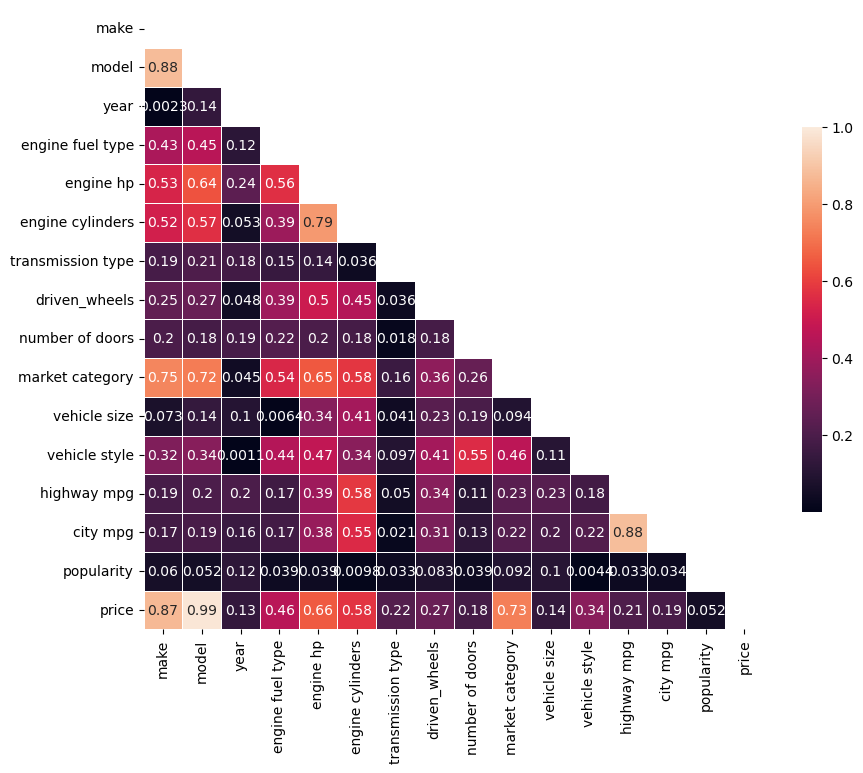

In [24]:
corr=np.abs(df_cars.corr()) #corr(x,y) = corr(y,x), cor(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [25]:
X_train_reduced = X_train_norm.drop(columns = ["popularity", "year", "engine fuel type", "transmission type", "driven_wheels", "number of doors", "vehicle size", "vehicle style", "highway mpg", "city mpg"])
X_test_reduced = X_test_norm.drop(columns = ["popularity", "year", "engine fuel type", "transmission type", "driven_wheels", "number of doors", "vehicle size", "vehicle style", "highway mpg", "city mpg"])

In [26]:
X_train_reduced.head()

,make,model,engine hp,engine cylinders,market category
2359,0.010939,0.014365,0.199789,0.250,0.048416
2101,0.013090,0.014795,0.137421,0.250,0.048416
3544,0.011780,0.007028,0.053911,0.250,0.009885
3552,0.011780,0.013487,0.173362,0.375,0.054904
3307,0.016600,0.011384,0.231936,0.000,0.009885


## Linear Regression

In [27]:
lin_reg = LinearRegression()

In [28]:
#Determine the b0 and b1 values
lin_reg.fit(X_train_reduced, y_train_norm)

LinearRegression()

In [29]:
pred_norm = lin_reg.predict(X_test_reduced)
pred = pt_y.inverse_transform(pred_norm)

#pred_norm = lin_reg.predict(X_test_reduced)
#pred = normalizer_y.inverse_transform(pred_norm)

print(f"MAE: {mean_absolute_error(pred, y_test_norm): .2f}")
print(f"RMSE: {mean_squared_error(pred, y_test_norm, squared=False): .2f}")
print(f"R2 score: {lin_reg.score(X_test_reduced, y_test_norm)}")

MAE:  57183.68
RMSE:  272882.60
R2 score: 0.718886517311005


## Ensemble

#### Bagging & Pasting

In [30]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [31]:
bagging_reg.fit(X_train_norm, y_train_norm)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [32]:
pred_norm = bagging_reg.predict(X_test_norm)
pred = pt_y.inverse_transform(pred_norm.reshape(-1,1))

print(f"MAE: {mean_absolute_error(pred, y_test_norm):.2f}")
print(f"RMSE: {mean_squared_error(pred, y_test_norm, squared=False): .2f}")
print(f"R2 score: {bagging_reg.score(X_test_norm, y_test_norm)}")

MAE: 51351.75
RMSE:  80444.59
R2 score: 0.9855429717040023


#### Random Forest

In [33]:
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

In [34]:
forest.fit(X_train_norm, y_train_norm)

/var/folders/kz/yfq5dclx7cd6vx_pj9dj5d6m0000gn/T/ipykernel_91775/451227543.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_norm, y_train_norm)


RandomForestRegressor(max_depth=20)

In [35]:
pred_norm = forest.predict(X_test_norm)
pred = pt_y.inverse_transform(pred_norm.reshape(-1,1))

print(f"MAE: {mean_absolute_error(pred, y_test_norm):.2f}")
print(f"RMSE: {mean_squared_error(pred, y_test_norm, squared=False): .2f}")
print(f"R2 score: {forest.score(X_test_norm, y_test_norm)}")

MAE: 51891.62
RMSE:  85213.05
R2 score: 0.9895788558485807


#### AdaBoost

In [36]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [37]:
ada_reg.fit(X_train_norm, y_train_norm)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [38]:
pred_norm = ada_reg.predict(X_test_norm)
pred = pt_y.inverse_transform(pred_norm.reshape(-1,1))

print("MAE", mean_absolute_error(pred, y_test_norm))
print("RMSE", mean_squared_error(pred, y_test_norm, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test_norm))

MAE 51991.83199035361
RMSE 86102.90223822148
R2 score 0.9891864719826725


#### Gradient Boosting

In [39]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [40]:
gb_reg.fit(X_train_norm, y_train_norm)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=20)

In [41]:
pred_norm = gb_reg.predict(X_test_norm)
pred = pt_y.inverse_transform(pred_norm.reshape(-1,1))

print("MAE", mean_absolute_error(pred, y_test_norm))
print("RMSE", mean_squared_error(pred, y_test_norm, squared=False))
print("R2 score", gb_reg.score(X_test_norm, y_test_norm))

MAE 52074.705065494185
RMSE 86811.21537263002
R2 score 0.9859264567011576


In [42]:
import plotly.express as px

In [55]:
pred_norm = forest.predict(X_test_norm)
pred = pt_y.inverse_transform(pred_norm.reshape(-1,1))

In [56]:
y_pred = pd.DataFrame(pred, columns = ['Predicted Output'])
y_pred

,Predicted Output
0,2009.208807
1,95097.907131
2,47677.198485
3,33195.393642
4,29991.973740
...,...
1630,47632.299576
1631,93637.154674
1632,52266.840788
1633,39285.503837


In [57]:
y_test.to_frame().head()

,price
4257,2000
541,94200
49,50750
257,30210
5745,31730


In [58]:
results = pd.concat([y_pred, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
results.head()

,Predicted Output,price
0,2009.208807,2000
1,95097.907131,94200
2,47677.198485,50750
3,33195.393642,30210
4,29991.973740,31730


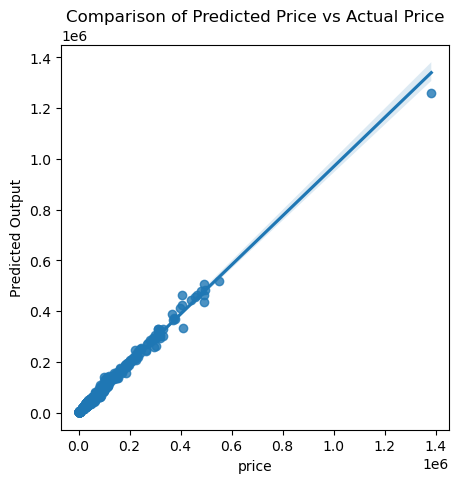

In [59]:
plt.figure(figsize = (5, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', marker = 'o')
plt.title("Comparison of Predicted Price vs Actual Price")
plt.show()

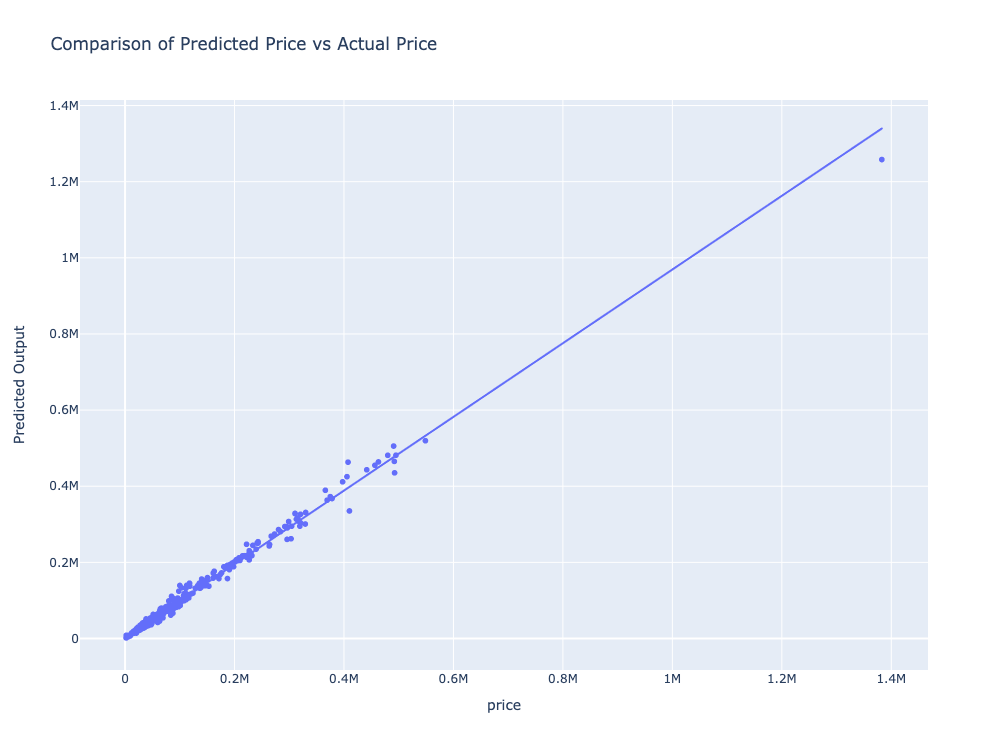

In [64]:
fig = px.scatter(results, x='price', y='Predicted Output', trendline='ols', title='Comparison of Predicted Price vs Actual Price')
fig.update_layout(width = 1000, height = 750)
fig.show()

## Decision Tree

In [49]:
tree = DecisionTreeRegressor(max_depth=10)

In [50]:
tree.fit(X_train_norm, y_train_norm)

DecisionTreeRegressor(max_depth=10)

In [51]:
pred_norm = tree.predict(X_test_norm)
pred = pt_y.inverse_transform(pred_norm.reshape(-1,1))

print("MAE:", mean_absolute_error(pred, y_test_norm))
print("RMSE:", mean_squared_error(pred, y_test_norm, squared=False))
print("R2 score:", tree.score(X_test_norm, y_test_norm))

MAE: 52016.016240844576
RMSE: 86619.45128235898
R2 score: 0.9860507928390073


In [52]:
tree_importance = {feature : importance for feature, importance in zip(X_train_norm.columns, tree.feature_importances_)}
tree_importance

{'make': 0.001660903264609705,
 'model': 0.5189183947156252,
 'year': 0.4601719420357306,
 'engine fuel type': 7.515351957365121e-05,
 'engine hp': 0.00921388692240958,
 'engine cylinders': 0.001387837391620129,
 'transmission type': 0.00037228232279897867,
 'driven_wheels': 0.0004062468960796212,
 'number of doors': 0.001075000096155286,
 'market category': 0.0020992417855789066,
 'vehicle size': 0.0005756649198115032,
 'vehicle style': 0.0006818267320849383,
 'highway mpg': 0.0004708002938698176,
 'city mpg': 0.001106897743612556,
 'popularity': 0.001783921360439397}